In [1]:
#Load the necesssary libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
%matplotlib inline

#### We will start the process by loading the cleaned datasets of Arabica and Robusta.

In [2]:
#Load the datasets
df_arabica=pd.read_csv('arabica_data_cleaned.csv',index_col=[0])
df_robusta=pd.read_csv('robusta_data_cleaned.csv',index_col=[0])

In [3]:
df_arabica.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
df_arabica.isnull().sum()

Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                146
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers                     1
Color     

In [5]:
df_arabica.Owner.value_counts().head(10)

juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
cqi taiwan icp cqi台灣合作夥伴             47
lin, che-hao krude 林哲豪               30
nucoffee                             29
carcafe ltda ci                      27
the coffee source inc.               23
Name: Owner, dtype: int64

In [6]:
df_arabica['Country.of.Origin'].value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Nicaragua                        26
Uganda                           26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
Myanmar                           8
United States                     8
Vietnam                           7
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Laos                              3
Burundi                     

In [7]:
df_arabica['Farm.Name'].value_counts().head(10)

various                         47
rio verde                       23
several                         20
finca medina                    15
fazenda capoeirnha              13
doi tung development project    13
los hicaques                    11
conquista / morito              11
capoeirinha                     10
el papaturro                     9
Name: Farm.Name, dtype: int64

In [8]:
df_arabica['Lot.Number'].isnull().sum()

1041

In [9]:
df_arabica['Lot.Number'].value_counts()

1                                                       18
020/17                                                   6
019/17                                                   5
103                                                      3
2016 Tainan Coffee Cupping Event Micro Lot 臺南市咖啡評鑑批次     3
                                                        ..
01NG011                                                  1
MCCFWXA15/16                                             1
11/23/0145                                               1
3-37-1606                                                1
KLEM-C08                                                 1
Name: Lot.Number, Length: 221, dtype: int64

In [10]:
for i in df_arabica.columns:
    print(i)
    print(df_arabica[i].value_counts())

Species
Arabica    1311
Name: Species, dtype: int64
Owner
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
enrique mitre lopez                   1
case noyale ltd                       1
finca estate                          1
delfina leon shine                    1
octavio augusto diaz trejo            1
Name: Owner, Length: 305, dtype: int64
Country.of.Origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Nicaragua                        26
Uganda       

In [11]:
df_arabica.Region.value_counts()

huila                                      112
oriente                                     80
south of minas                              68
kona                                        66
veracruz                                    35
                                          ... 
berastagi                                    1
taiwu township , pingtung county 屏東縣泰武鄉      1
kayanza                                      1
vietnam cau dat                              1
sierra alta mixe y zapoteca                  1
Name: Region, Length: 343, dtype: int64

In [12]:
df_robusta.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,1488,sheema south western,...,Green,2,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1488.0,1488.0,1488.0
2,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,chikmagalur karnataka indua,...,NaN,2,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.0,3170.0,3170.0
3,Robusta,andrew hetzel,India,sethuraman estate,NaN,NaN,0000,sethuraman estate,1000m,chikmagalur,...,Green,0,"April 29th, 2016",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.0,1000.0,1000.0
4,Robusta,ugacof,Uganda,ugacof project area,NaN,ugacof,0,ugacof ltd,1212,central,...,Green,7,"July 14th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1212.0,1212.0,1212.0
5,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,luwero central region,...,Green,3,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1300.0,1250.0


In [13]:
for i in df_robusta.columns:
    print(i)
    print(df_robusta[i].value_counts())

Species
Robusta    28
Name: Species, dtype: int64
Owner
andrew hetzel                        9
nishant gurjer                       4
ugacof                               3
luis robles                          2
cafe politico                        2
ankole coffee producers coop         2
nitubaasa ltd                        1
kawacom uganda ltd                   1
katuka development trust ltd         1
james moore                          1
mannya coffee project                1
kasozi coffee farmers association    1
Name: Owner, dtype: int64
Country.of.Origin
India            13
Uganda           10
United States     2
Ecuador           2
Vietnam           1
Name: Country.of.Origin, dtype: int64
Farm.Name
sethuraman estates                    6
sethuraman estate                     3
sethuraman estate kaapi royale        3
ugacof project area                   2
robustasa                             2
kyangundu coop society                1
bushenyi                              1
kyan

In [14]:
df_arabica.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [15]:
df_robusta.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year               int64
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Fragrance...Aroma        float64
Flavor                   float64
Aftertaste               float64
Salt...Acid              float64
Bitter...Sweet           float64
Mouthfeel                float64
Uniform.Cup              float64
Clean.Cup                float64
Balance                  float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [16]:
df_arab=df_arabica[['Species','Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Total.Cup.Points','Moisture']]

In [17]:
df_robu=df_robusta[['Species','Fragrance...Aroma','Flavor','Aftertaste','Salt...Acid','Bitter...Sweet','Mouthfeel','Uniform.Cup','Clean.Cup','Balance','Cupper.Points','Total.Cup.Points','Moisture']]

In [18]:
df_robu.head()

,Species,Fragrance...Aroma,Flavor,Aftertaste,Salt...Acid,Bitter...Sweet,Mouthfeel,Uniform.Cup,Clean.Cup,Balance,Cupper.Points,Total.Cup.Points,Moisture
1,Robusta,7.83,8.08,7.75,7.92,8.00,8.25,10.0,10.0,7.92,8.00,83.75,0.12
2,Robusta,8.00,7.75,7.92,8.00,8.00,7.92,10.0,10.0,7.92,8.00,83.50,0.00
3,Robusta,7.92,7.83,7.92,8.00,7.83,7.83,10.0,10.0,7.92,8.00,83.25,0.00
4,Robusta,8.00,7.92,7.92,7.75,7.75,7.83,10.0,10.0,7.75,8.08,83.00,0.12
5,Robusta,8.33,7.83,7.83,7.75,7.58,8.25,10.0,10.0,7.75,7.67,83.00,0.12


In [19]:
df_arab.head()

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
1,Arabica,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12
2,Arabica,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12
3,Arabica,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00
4,Arabica,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11
5,Arabica,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12


In [20]:
df_robu.shape

(28, 13)

In [21]:
df_arab.shape

(1311, 13)

In [22]:
df_robu.isnull().sum()

Species              0
Fragrance...Aroma    0
Flavor               0
Aftertaste           0
Salt...Acid          0
Bitter...Sweet       0
Mouthfeel            0
Uniform.Cup          0
Clean.Cup            0
Balance              0
Cupper.Points        0
Total.Cup.Points     0
Moisture             0
dtype: int64

In [23]:
df_arab.isnull().sum()

Species             0
Aroma               0
Flavor              0
Aftertaste          0
Acidity             0
Body                0
Balance             0
Uniformity          0
Clean.Cup           0
Sweetness           0
Cupper.Points       0
Total.Cup.Points    0
Moisture            0
dtype: int64

In [24]:
df_robu.columns = ['Species','Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Total.Cup.Points','Moisture']

In [25]:
combined_df=pd.concat([df_arab,df_robu])

In [26]:
#reset the index
combined_df = combined_df.reset_index(drop=True)

In [27]:
combined_df.tail()

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
1334,Robusta,7.75,7.58,7.33,7.58,7.75,5.08,10.00,10.00,7.83,7.83,78.75,0.00
1335,Robusta,7.50,7.67,7.75,7.75,8.42,5.17,10.00,10.00,5.25,8.58,78.08,0.00
1336,Robusta,7.33,7.33,7.17,7.42,7.42,7.50,9.33,9.33,7.17,7.17,77.17,0.00
1337,Robusta,7.42,6.83,6.75,7.17,7.08,7.25,9.33,9.33,7.00,6.92,75.08,0.10
1338,Robusta,6.75,6.67,6.50,6.83,6.67,6.92,9.33,9.33,6.83,7.92,73.75,0.12


In [28]:
combined_df['Species'].replace({'Arabica':1,'Robusta':0},inplace=True)

In [29]:
combined_df.Species.value_counts()

1    1311
0      28
Name: Species, dtype: int64

In [30]:
print(df_arab.shape,df_robu.shape)

(1311, 13) (28, 13)


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report

In [32]:
# a helper function to draw confusion matrices
def draw_cm(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  df_cm = pd.DataFrame(cm_norm)
  plt.figure(figsize = (6,4))
  sns.heatmap(df_cm, annot=True, cmap="Blues")
  plt.xlabel("Predicted class")
  plt.ylabel("True class")
  plt.show()
  print("Accuracy: {0:.3f}".format(accuracy_score(y_test, y_pred)))
  print("Recall: {0:.3f}".format(recall_score(y_test, y_pred)))

In [33]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [35]:
# Implementing Oversampling for Handling Imbalanced 
X= combined_df.drop('Species', axis = 1)
y=combined_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
#smk = SMOTETomek(random_state=42)
#X_res,y_res=smk.fit_resample(X_train,y_train)

In [93]:
print(X.shape,Y.shape)

(1339, 12) (1339,)


In [94]:
print(X_train.shape,y_train.shape)

(1071, 12) (1071,)


In [95]:
print(X_test.shape,y_test.shape)

(268, 12) (268,)


In [96]:
y_train.value_counts()

1    1049
0      22
Name: Species, dtype: int64

In [97]:
y_res.value_counts()

1    1049
0    1049
Name: Species, dtype: int64

In [ ]:
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [55]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation
#draw_cm(y_test,ypred)

0.9980879541108987

In [56]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, ypred)

0.9240515783873617

In [57]:
print(classification_report(y_test, ypred, target_names=['Robusta','Arabica']))

              precision    recall  f1-score   support

     Robusta       0.86      1.00      0.92         6
     Arabica       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       0.93      1.00      0.96       268
weighted avg       1.00      1.00      1.00       268



In [58]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       0.93      1.00      0.96       268
weighted avg       1.00      1.00      1.00       268



In [59]:
confusion_matrix(y_test, ypred)

array([[  6,   0],
       [  1, 261]], dtype=int64)

In [129]:
X_train[['Flavor','Acidity']]

,Flavor,Acidity
813,7.33,7.42
1036,7.33,6.83
194,7.75,7.92
240,7.75,7.75
1169,6.92,7.42
...,...,...
763,7.50,7.42
835,7.50,7.50
1216,7.17,7.58
559,7.58,7.58


0.9980952380952381


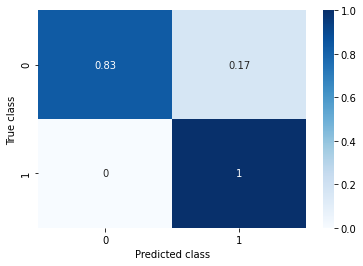

Accuracy: 0.996
Recall: 1.000


In [51]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
print(evaluation)
draw_cm(y_test,ypred)

In [54]:
confusion_matrix(y_test, ypred)


array([[  5,   1],
       [  0, 262]], dtype=int64)

In [52]:
matthews_corrcoef(y_test, ypred)

0.9111337802573134

In [53]:
print(classification_report(y_test, ypred, target_names=['Robusta','Arabica']))

              precision    recall  f1-score   support

     Robusta       1.00      0.83      0.91         6
     Arabica       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       1.00      0.92      0.95       268
weighted avg       1.00      1.00      1.00       268



In [44]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       1.00      0.92      0.95       268
weighted avg       1.00      1.00      1.00       268



In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#wrf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

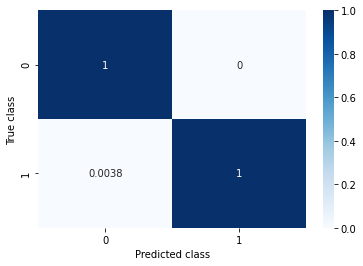

Accuracy: 0.996
Recall: 0.996


In [45]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation
draw_cm(y_test,ypred)

In [46]:
matthews_corrcoef(y_test, ypred)

0.9240515783873617

In [47]:
print(classification_report(y_test, ypred, target_names=['Robusta','Arabica']))

              precision    recall  f1-score   support

     Robusta       0.86      1.00      0.92         6
     Arabica       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       0.93      1.00      0.96       268
weighted avg       1.00      1.00      1.00       268



In [49]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       0.93      1.00      0.96       268
weighted avg       1.00      1.00      1.00       268



In [50]:

confusion_matrix(y_test, ypred)


array([[  6,   0],
       [  1, 261]], dtype=int64)